# Image classifier with Convolutional Neural Networks

The dataset used is the CIFAR-10 dataset, available at: https://www.cs.toronto.edu/~kriz/cifar.html

In [80]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#### Visualizing data

In [81]:
# Loading data
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [82]:
X_test.shape

(10000, 32, 32, 3)

In [83]:
X_train.shape

(50000, 32, 32, 3)

In [84]:
y_train.shape

(50000, 1)

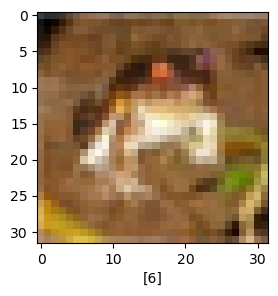

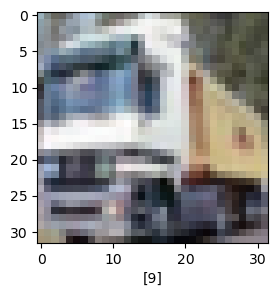

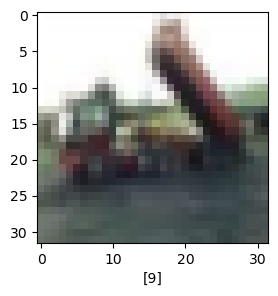

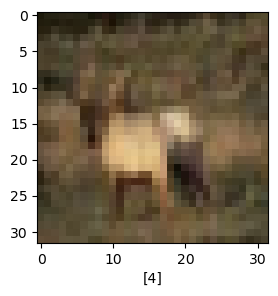

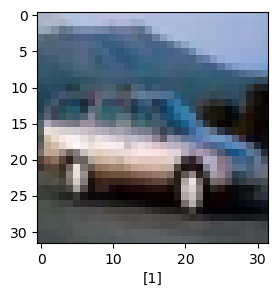

In [85]:
# Visualizing the data
for index in range(5):
    plt.figure(figsize=(13, 3))
    plt.imshow(X_train[index])
    plt.xlabel(y_train[index])
    plt.show()

In [86]:
y_train[0]

array([6], dtype=uint8)

In [87]:
# Creating a function for easier visualization, the y values are the classes and X are the images
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def visualize_image(X, y, index):
    plt.figure(figsize=(13, 3))
    plt.xlabel(classes[y_train[index][0]])
    plt.imshow(X_train[index])
    plt.show()

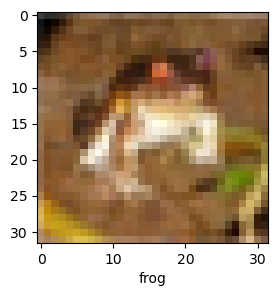

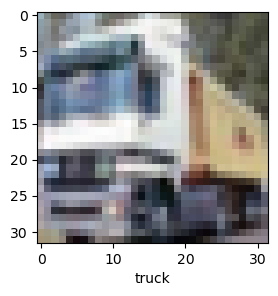

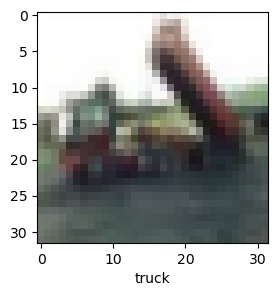

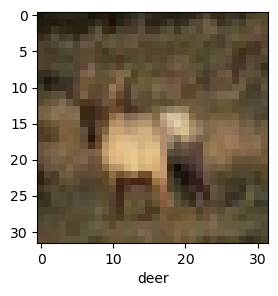

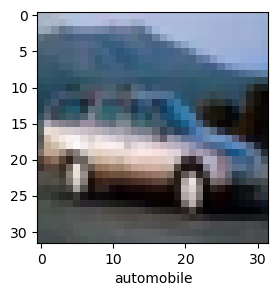

In [88]:
# Testing the function
for index in range(5):
    visualize_image(X_train, y_train, index)

#### Normalizing data

In [89]:
# Since the images are in the range of 0-255, we need to normalize them to 0-1
X_train, X_test = X_train / 255, X_test / 255

#### Creating the model

![CNN Diagram](cnn_diagram.png)

A generic CNN Diagram to ilustrate the model

Image Source: GERÓN, Aurélien. Mãos à Obra Aprendizado de Máquina com Scikit-Learn & TensorFlow: Conceitos, Ferramentas e Técnicas Para a Construção de Sistemas Inteligentes. Traduzido por Rafael Contatori. Rio de Janeiro: Alta Books, 2019.

In [90]:
cnn = models.Sequential([
    # convolution
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    # pooling
    layers.MaxPooling2D((2, 2)),
    # convolution
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    # pooling
    layers.MaxPooling2D((2, 2)),
    
    # dense layers
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),  
])

c:\Users\lucas\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Training the model

In [91]:
cnn.compile(
            optimizer = 'nadam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy']
            )

In [92]:
cnn.fit(X_train, y_train, epochs = 20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3984 - loss: 1.6530
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5854 - loss: 1.1756
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6475 - loss: 1.0203
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6752 - loss: 0.9386
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6939 - loss: 0.8813
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7165 - loss: 0.8221
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7288 - loss: 0.7844
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7440 - loss: 0.7335
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7569 - loss: 0.7019
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7700 - loss: 0.6570
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7807 - loss: 0.6301
Epoch 12/20
1563/15

#### Testing the model

In [93]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6995 - loss: 1.0540


[1.0828443765640259, 0.6881999969482422]

In [94]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [95]:
y_pred[0]

array([2.1395937e-07, 5.2204103e-07, 2.3311282e-05, 4.3523702e-01,
       1.9256950e-06, 5.6391925e-01, 7.8709534e-04, 4.9124092e-06,
       2.4957604e-05, 8.0792569e-07], dtype=float32)

In [96]:
np.argmax(y_pred[0])

5

In [129]:
y_classes = [np.argmax(pred) for pred in y_pred]
y_classes[:3]

[5, 8, 8]

In [127]:
y_test[:3]

array([[3],
       [8],
       [8]], dtype=uint8)

In [132]:
# Checking a classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.82      0.78      0.80      1000
           2       0.54      0.60      0.57      1000
           3       0.52      0.45      0.48      1000
           4       0.64      0.67      0.65      1000
           5       0.54      0.66      0.60      1000
           6       0.82      0.72      0.77      1000
           7       0.74      0.75      0.74      1000
           8       0.76      0.82      0.79      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [133]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']